In [1]:
#IMPORT Requisite Packages
import vaex
import matplotlib
import matplotlib.pylab as plt
import numpy as np

In [2]:
#CONFIGURE Settings
%matplotlib inline
np.warnings.filterwarnings('ignore')

In [3]:
# OPEN Input Catalog File
# Note the final version of the DR4 catalog has a filesize of 9.7 GB filename and a 
# filenmae of "KiDS_DR4_multiband-culled-FINAL.hdf5"
# It contains 24 columns of data and has 100,350,804 entries.
# The catalog has been culled from the original "multiband" version and has been combined using various vaex built-in functions.

In [3]:
# OPEN Input Catalog HDF5 File
df = vaex.open("KiDS_DR4_multiband-culled-FINAL.hdf5")

In [6]:
# VERIFY the Catalog file in cursory fashion
df
len(df)
df.shape
df.get_column_names()

['ID',
 'KIDS_TILE',
 'RAJ2000',
 'DECJ2000',
 'CLASS_STAR',
 'MAG_GAAP_u',
 'MAGERR_GAAP_u',
 'MAG_GAAP_g',
 'MAGERR_GAAP_g',
 'MAG_GAAP_r',
 'MAGERR_GAAP_r',
 'MAG_GAAP_i',
 'MAGERR_GAAP_i',
 'MAG_GAAP_Z',
 'MAGERR_GAAP_Z',
 'MAG_GAAP_Y',
 'MAGERR_GAAP_Y',
 'MAG_GAAP_J',
 'MAGERR_GAAP_J',
 'MAG_GAAP_H',
 'MAGERR_GAAP_H',
 'MAG_GAAP_Ks',
 'MAGERR_GAAP_Ks',
 'MASK']

In [7]:
#PERFORM basic statistics
df['g_mag'] = df.MAG_GAAP_g
g_min, g_max = df.minmax(df.g_mag)
g_min, g_max

(12.929608, 26.913559)

In [8]:
#PERFORM basic statistics
df.count(df.g_mag)

array(93436037)

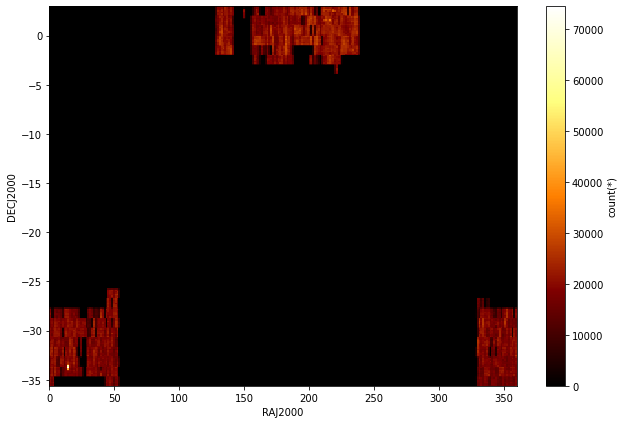

In [9]:
#PLOT Catalog Sky Density as a function of RA and DEC
df.plot("RAJ2000", "DECJ2000", figsize=(9,6)) 

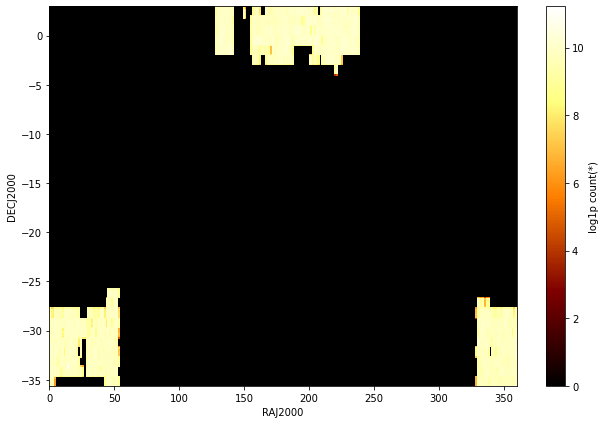

In [10]:
#PLOT Catalog Sky Density as a function of RA and DEC 
df.plot("RAJ2000", "DECJ2000", f="log1p", figsize=(9,6))

In [11]:
#Generate higher-dimensional histogram
limits_ra = [0, 360]
limits_dec = [-90, 90]
counts_per_sky_element = df.count(binby=[df.RAJ2000, df.DECJ2000], limits=[limits_ra, limits_dec], shape=[400,200], progress=True)
counts_per_sky_element

[########################################] 100.00% elapsed time  :     0.24s =  0.0m =  0.0h
 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

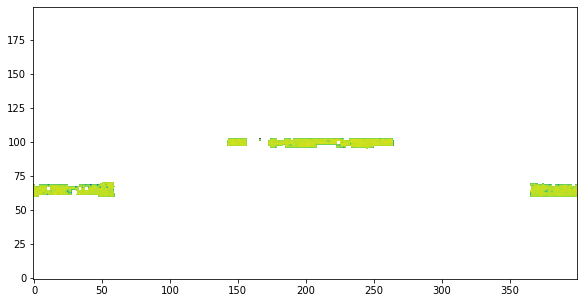

In [12]:
#VISUALIZE with Matplotlib and imshow
plt.figure(figsize=(10,5))
plt.imshow(np.log10(counts_per_sky_element).T, origin='lower')

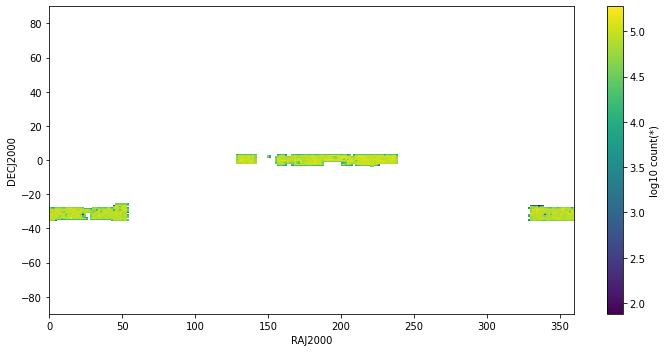

In [13]:
#VISUALIZE with bulit-in VAEX function
df.viz.heatmap(df.RAJ2000, df.DECJ2000, limits=[limits_ra, limits_dec], f='log10', colormap='viridis', figsize=(10,5))

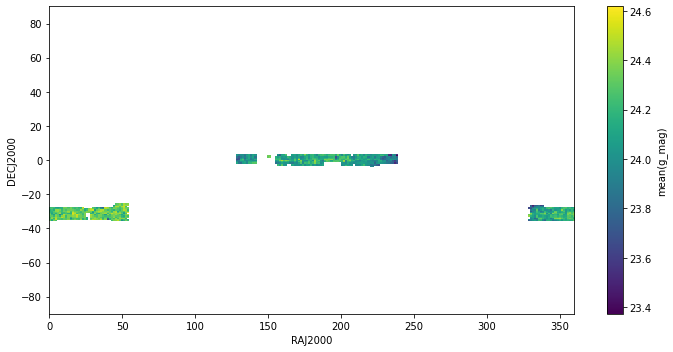

In [14]:
# PLOT as a function of mean r_magnitude and VAEX
df.viz.heatmap(df.RAJ2000, df.DECJ2000, limits=[limits_ra, limits_dec], colormap='viridis', figsize=(10,5), what=vaex.stat.mean(df.g_mag))